## Exploring Classification Models and Boosting Techniques on Australian Weather Data

**Dataset:**
The Australian weather dataset comprises historical meteorological data collected from various weather stations across Australia. 

**Objective:**
The primary objective of this project is twofold:

•To compare the performance of different classification models, including decision tree, random forest, and logistic regression, in predicting weather conditions accurately.

•To evaluate the effectiveness of three types of boosting techniques—AdaBoost, Gradient Boosting, and XGBoost—in enhancing the predictive performance of the classification models.

By achieving these objectives, the project aims to identify the most suitable algorithms and boosting methods for weather prediction tasks based on their performance on the Australian weather dataset. Insights gained from this analysis can inform the development of more accurate and reliable weather forecasting systems, benefiting various industries such as agriculture, transportation, and disaster management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\weatherAUS.csv")
data

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
data.shape

(145460, 23)

### Data Cleaning

In [4]:
data.isna().sum()

date                 0
location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
dtype: int64

In [5]:

# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Print missing percentage for each column
print("Missing percentage of each column:")
print(missing_percentage)

Missing percentage of each column:
date              0.000000
location          0.000000
mintemp           1.020899
maxtemp           0.866905
rainfall          2.241853
evaporation      43.166506
sunshine         48.009762
windgustdir       7.098859
windgustspeed     7.055548
winddir9am        7.263853
winddir3pm        2.906641
windspeed9am      1.214767
windspeed3pm      2.105046
humidity9am       1.824557
humidity3pm       3.098446
pressure9am      10.356799
pressure3pm      10.331363
cloud9am         38.421559
cloud3pm         40.807095
temp9am           1.214767
temp3pm           2.481094
raintoday         2.241853
raintomorrow      2.245978
dtype: float64


In [6]:
# Drop columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index
data.drop(columns=columns_to_drop, inplace=True)

In [7]:
# Print the columns being dropped
print("Dropping columns with more than 30% missing values:", columns_to_drop)

Dropping columns with more than 30% missing values: Index(['evaporation', 'sunshine', 'cloud9am', 'cloud3pm'], dtype='object')


In [8]:
# Remove rows with missing values in the target variable
data_cleaned = data.dropna(subset=["raintomorrow"])

In [9]:
# Visualize the distribution of numerical features
numeric_columns = data_cleaned.select_dtypes(include=["float64", "int64"]).columns

# for column in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data_cleaned[column].dropna(), kde=True)
#     plt.title(f"Distribution of {column}")
#     plt.xlabel(column)
#     plt.ylabel("Frequency")
#     plt.show()

In [10]:
categorical_columns = data.select_dtypes(include=["object"]).columns

In [11]:
# Impute missing values in numerical features
for column in numeric_columns:
    if data_cleaned[column].isnull().any():
        if data_cleaned[column].dtype == 'float64' or data_cleaned[column].dtype == 'int64':
            # Impute missing values with mean for numerical features
            data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)
        else:
            # Impute missing values with median for other numerical-like features
            data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3098185376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)


In [12]:
# Impute missing values in categorical features
for column in categorical_columns:
    if data_cleaned[column].isnull().any():
        # Impute missing values with mode for categorical features
        data_cleaned[column].fillna(data_cleaned[column].mode().iloc[0], inplace=True)
        

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\1666044798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column].fillna(data_cleaned[column].mode().iloc[0], inplace=True)


In [13]:
data_cleaned.isna().sum()
data_cleaned

,date,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6/20/2017,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,6/21/2017,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


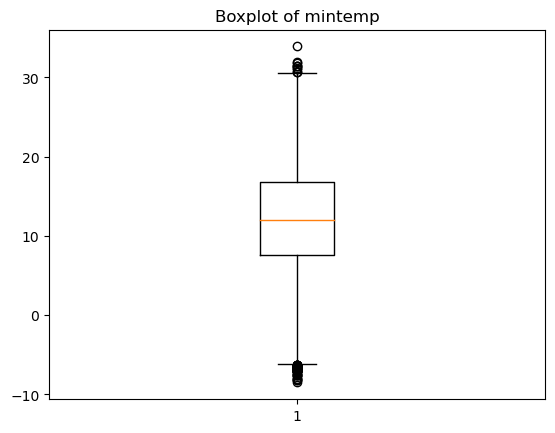

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


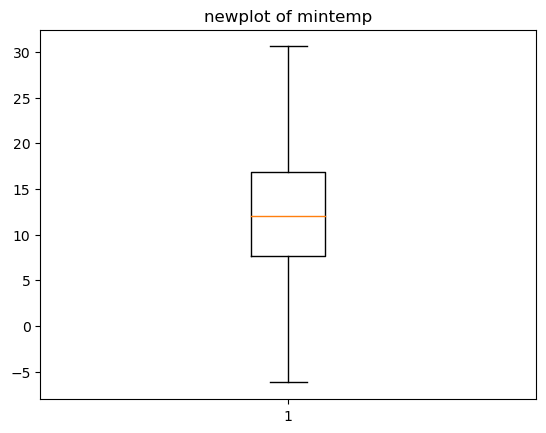

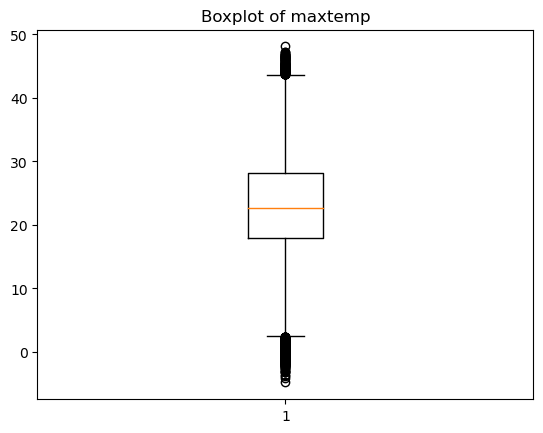

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


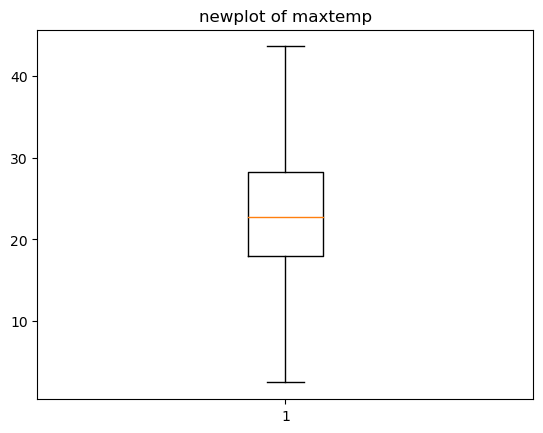

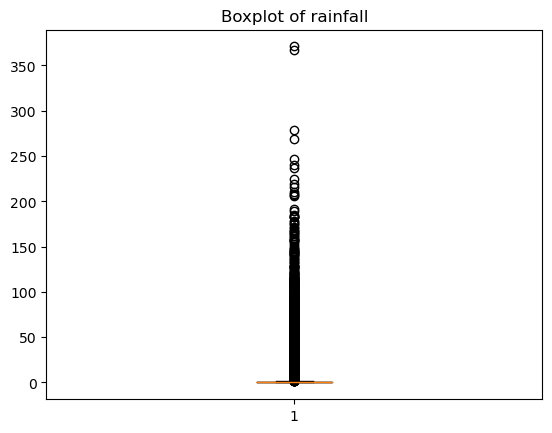

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


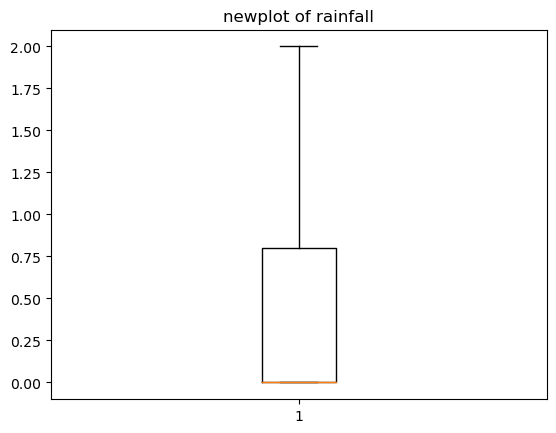

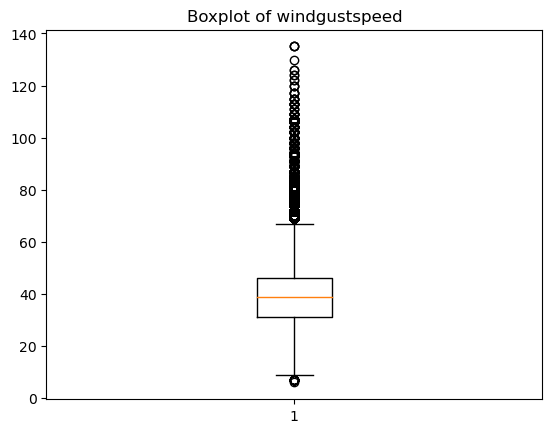

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


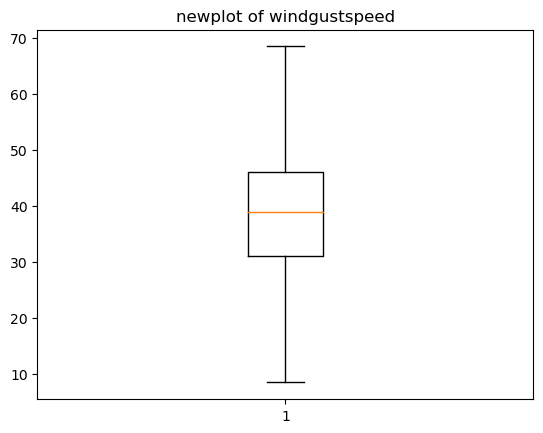

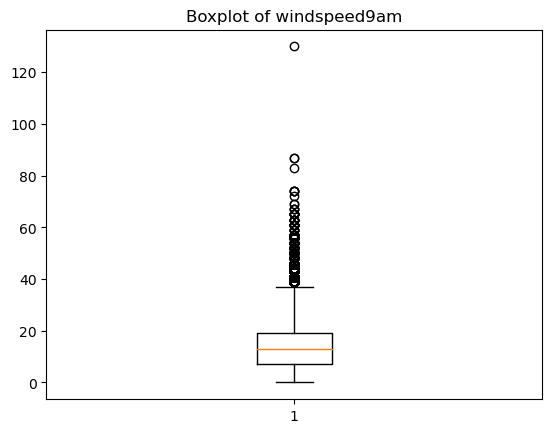

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


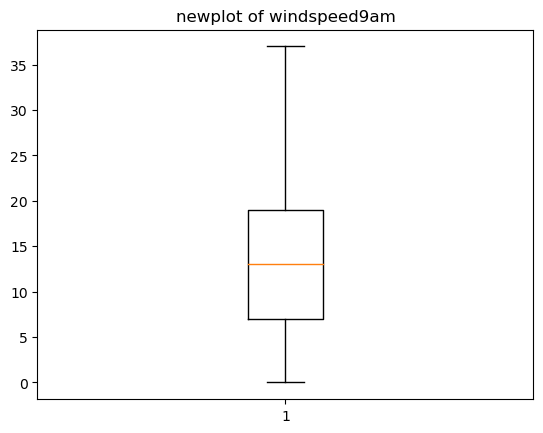

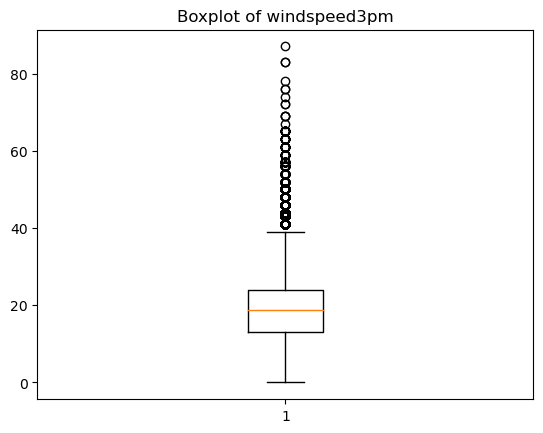

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


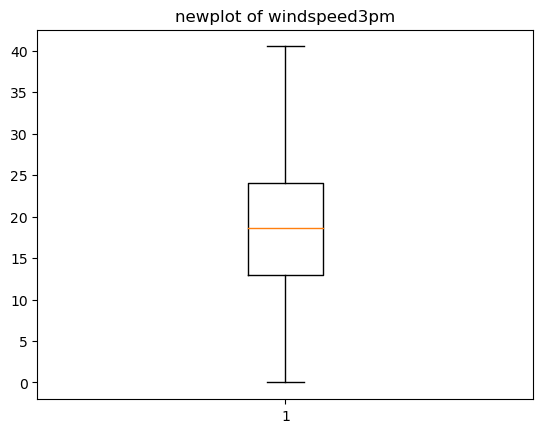

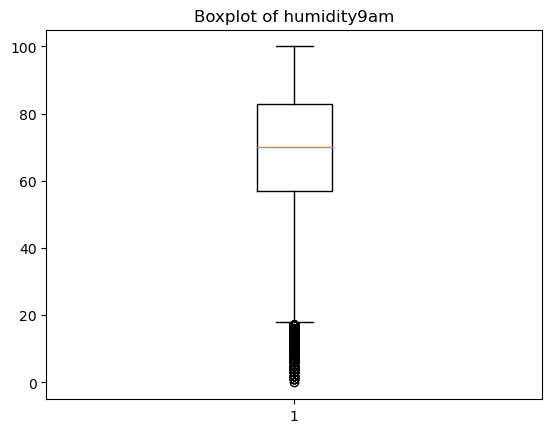

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


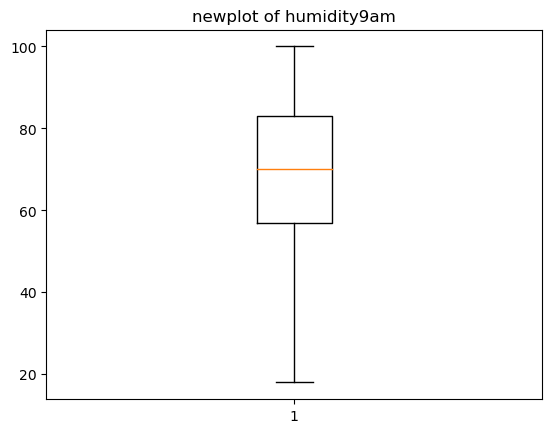

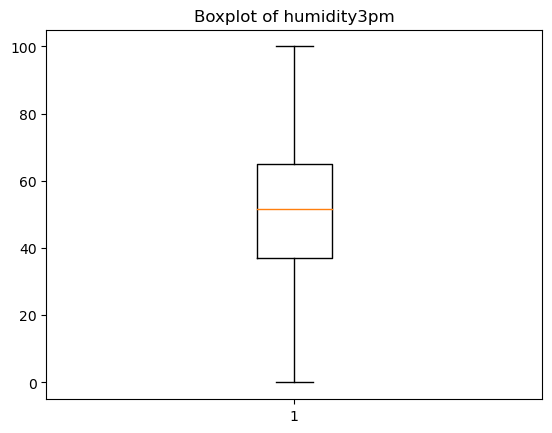

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


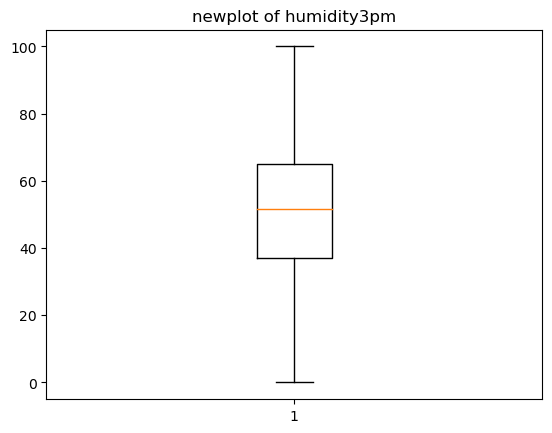

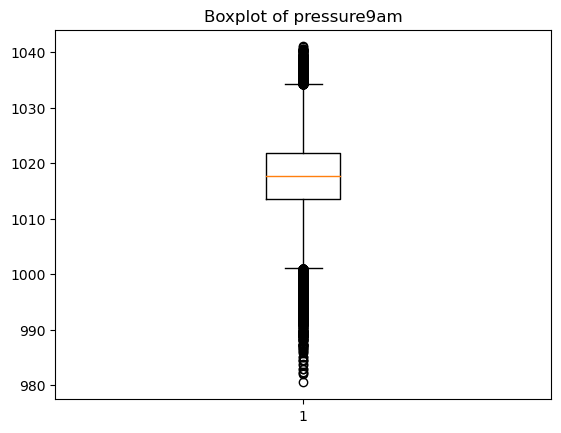

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


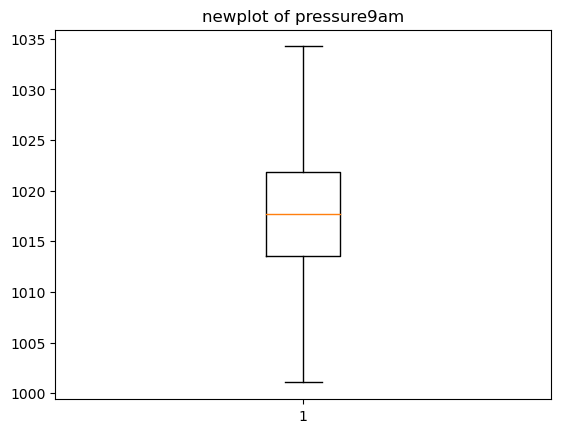

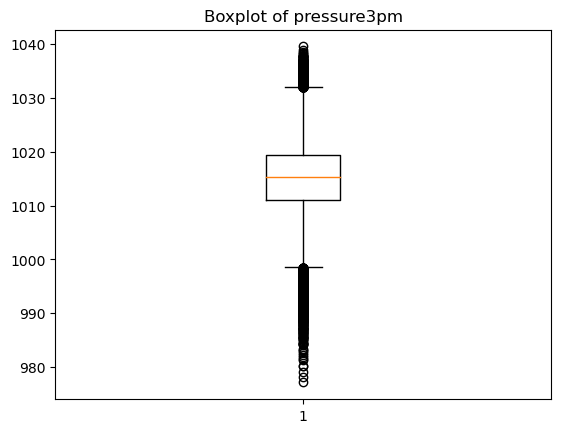

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


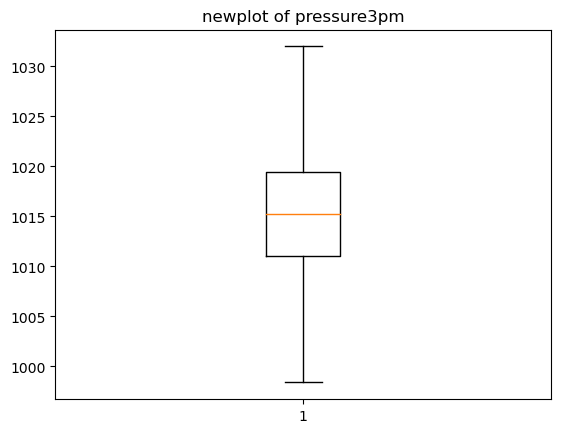

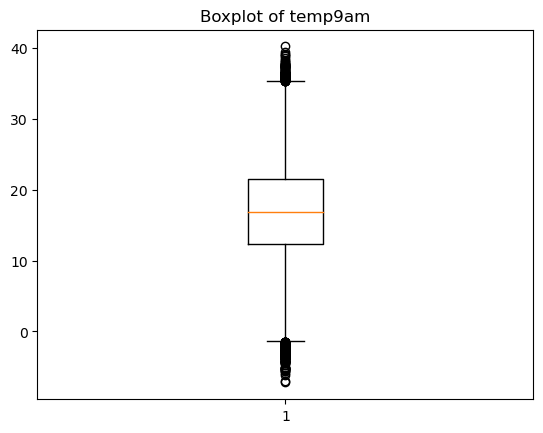

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


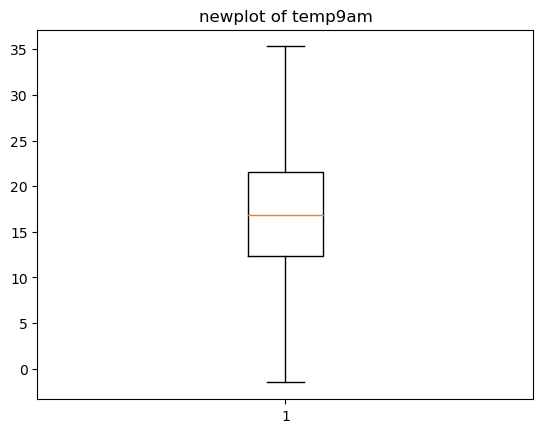

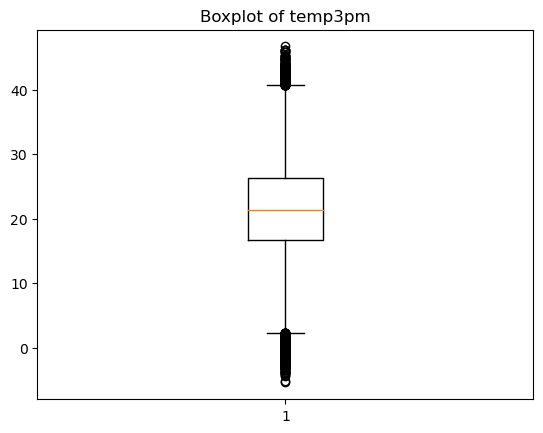

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3677446271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit)


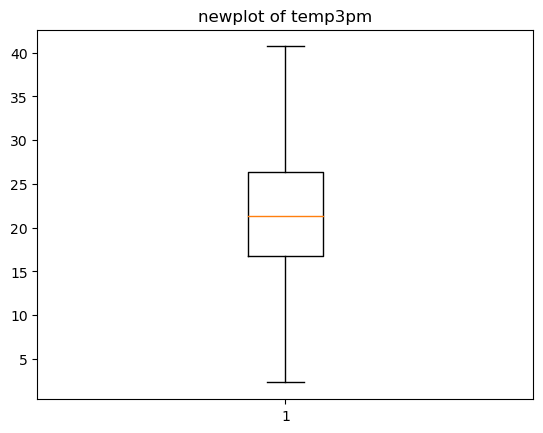

In [14]:
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns     
for column in numerical_columns:
    plt.boxplot(data_cleaned[column])
    plt.title("Boxplot of "+column)
    plt.show()
    IQR = data_cleaned[column].quantile(0.75) - data_cleaned[column].quantile(0.25)
    lower_limit = data_cleaned[column].quantile(0.25) - (1.5 * IQR)
    upper_limit = data_cleaned[column].quantile(0.75) + (1.5 * IQR)
    data_cleaned[column] = np.clip(data_cleaned[column], lower_limit, upper_limit) 
    plt.boxplot(data_cleaned[column])
    plt.title("newplot of "+column)
    plt.show()

In [15]:
# Perform label encoding for categorical variables

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data_cleaned['location']=labelencoder.fit_transform(data_cleaned['location'])
data_cleaned['windgustdir']=labelencoder.fit_transform(data_cleaned['windgustdir'])
data_cleaned['winddir9am']=labelencoder.fit_transform(data_cleaned['winddir9am'])
data_cleaned['winddir3pm']=labelencoder.fit_transform(data_cleaned['winddir3pm'])
data_cleaned['raintoday']=labelencoder.fit_transform(data_cleaned['raintoday'])
data_cleaned['raintomorrow']=labelencoder.fit_transform(data_cleaned['raintomorrow'])
data_cleaned

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\878962226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['location']=labelencoder.fit_transform(data_cleaned['location'])
C:\Users\admin\AppData\Local\Temp\ipykernel_15128\878962226.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['windgustdir']=labelencoder.fit_transform(data_cleaned['windgustdir'])
C:\Users\admin\AppData\Local\Temp\ipykernel_15128\878962226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

,date,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow
0,12/1/2008,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,12/2/2008,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12/3/2008,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,12/4/2008,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,12/5/2008,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6/20/2017,41,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,6/21/2017,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,6/22/2017,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,6/23/2017,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [16]:
# Convert 'date' column to datetime format
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Extract relevant features
data_cleaned['year'] = data_cleaned['date'].dt.year
data_cleaned['month'] = data_cleaned['date'].dt.month
data_cleaned['day'] = data_cleaned['date'].dt.day
data_cleaned['day_of_week'] = data_cleaned['date'].dt.dayofweek  # Monday=0, Sunday=6


C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3283903868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3283903868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['year'] = data_cleaned['date'].dt.year
C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3283903868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [17]:
# Drop the original 'date' column
data_cleaned.drop(columns=['date'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\4041273266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['date'], inplace=True)


### Model Building

In [18]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform


In [19]:
# Splitting features and target variable
X = data_cleaned.drop(columns=["raintomorrow"])
y = data_cleaned["raintomorrow"]
X

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,...,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,year,month,day,day_of_week
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,2008,12,1,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,2008,12,2,1
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,2008,12,3,2
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,2008,12,4,3
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,2008,12,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,...,27.0,1024.7,1021.2,9.4,20.9,0,2017,6,20,1
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,0,2017,6,21,2
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,0,2017,6,22,3
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,0,2017,6,23,4


In [20]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Classification Models

In [21]:
# Decision Tree
dt_param_dist = {
        'max_depth': randint(1, 20),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
        }
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_dist, cv=5, n_iter=50, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)
dt_best_model = dt_random_search.best_estimator_
dt_test_predictions = dt_best_model.predict(X_test)
dt_train_predictions = dt_best_model.predict(X_train)

In [22]:
# Random Forest
rf_param_dist = {
        'n_estimators': randint(50, 200),
        'max_depth': [None] + list(range(5, 16)),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5)
    }
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_dist, cv=5, n_iter=50, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
rf_best_model = rf_random_search.best_estimator_
rf_test_predictions = rf_best_model.predict(X_test)
rf_train_predictions = rf_best_model.predict(X_train)


In [23]:
# Logistic Regression
lr_param_dist = {
        'C': uniform(0.001, 10),
        'penalty': ['l1', 'l2']
    }
lr_random_search = RandomizedSearchCV(LogisticRegression(random_state=42), lr_param_dist, cv=5, n_iter=50, random_state=42, n_jobs=-1)
lr_random_search.fit(X_train, y_train)
lr_best_model = lr_random_search.best_estimator_
lr_test_predictions = lr_best_model.predict(X_test)
lr_train_predictions = lr_best_model.predict(X_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

In [24]:
print("Decision Tree test Accuracy:", accuracy_score(y_test, dt_test_predictions))
print("Decision Tree train Accuracy:", accuracy_score(y_train, dt_train_predictions))
print("Random Forest test Accuracy:", accuracy_score(y_test, rf_test_predictions))
print("Random Forest train Accuracy:", accuracy_score(y_train, rf_train_predictions))
print("Logistic Regression test Accuracy:", accuracy_score(y_test, lr_test_predictions))
print("Logistic Regression train Accuracy:", accuracy_score(y_train, lr_train_predictions))

Decision Tree test Accuracy: 0.8386370828791448
Decision Tree train Accuracy: 0.847996553967333
Random Forest test Accuracy: 0.8534758606139456
Random Forest train Accuracy: 0.9720537299787261
Logistic Regression test Accuracy: 0.8342768733077816
Logistic Regression train Accuracy: 0.8392671906042865


In [25]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [26]:
#Importing AdaBoost Classifier 
from sklearn.ensemble import AdaBoostClassifier



In [27]:
# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
ada_test_predictions = ada_model.predict(X_test)
ada_train_predictions = ada_model.predict(X_train)
ada_test_accuracy = accuracy_score(y_test, ada_test_predictions)
print("AdaBoost test Accuracy:", ada_test_accuracy)
ada_train_accuracy = accuracy_score(y_train, ada_train_predictions)
print("AdaBoost train Accuracy:", ada_train_accuracy)

AdaBoost test Accuracy: 0.8391996905657724
AdaBoost train Accuracy: 0.8421330238936653


In [28]:
#importing gradientboostclassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_train_predictions = gb_model.predict(X_train)
gb_test_predictions = gb_model.predict(X_test)
gb_train_accuracy = accuracy_score(y_train, gb_train_predictions)
gb_test_accuracy = accuracy_score(y_test, gb_test_predictions)
print("Gradient Boosting Train Accuracy:", gb_train_accuracy)
print("Gradient Boosting Test Accuracy:", gb_test_accuracy)


Gradient Boosting Train Accuracy: 0.8500448335882694
Gradient Boosting Test Accuracy: 0.8458806568444741


In [30]:
#importing extreme gradient boosting classifier
from xgboost import XGBClassifier

In [31]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
print("XGBoost Train Accuracy:", xgb_train_accuracy)
print("XGBoost Test Accuracy:", xgb_test_accuracy)

XGBoost Train Accuracy: 0.849069043725935
XGBoost Test Accuracy: 0.845529027040332


In [32]:
print("AdaBoost test Accuracy:", ada_test_accuracy)
print("AdaBoost train Accuracy:", ada_train_accuracy)
print("Gradient Boosting Train Accuracy:", gb_train_accuracy)
print("Gradient Boosting Test Accuracy:", gb_test_accuracy)
print("XGBoost Train Accuracy:", xgb_train_accuracy)
print("XGBoost Test Accuracy:", xgb_test_accuracy)

AdaBoost test Accuracy: 0.8391996905657724
AdaBoost train Accuracy: 0.8421330238936653
Gradient Boosting Train Accuracy: 0.8500448335882694
Gradient Boosting Test Accuracy: 0.8458806568444741
XGBoost Train Accuracy: 0.849069043725935
XGBoost Test Accuracy: 0.845529027040332
